## Task-3 : SMS spam detection with using SVM classifier
   ## submitted
   ## by
   ## Balaji


# Install the necessary libraries

In [1]:
## Install the necessary librares 
## numpy,pandas,Sci-kit learn
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

# Import the necessary libraries

In [3]:
## import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the dataset

In [4]:
# Read the dataset
df = pd.read_csv("C:\\Users\\91781\\Downloads\\archive (2)\\spam.csv", encoding='latin-1')

In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
# dataset size
df.size

27860

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [11]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

# check the null values in the above dataset

In [12]:
# check the null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [13]:
# print the columns
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


# Data preprocessing

In [14]:
# Assuming the columns are named 'v1' and 'v2', modify accordingly
X = df['v2']
y = df['v1']

In [15]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(X)

# split the data into train and test values

In [16]:
# split the dataser into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# support vector machine

In [17]:
# Choosing a Model (Support Vector Machine)
classifier = SVC(kernel='linear', random_state=42)

In [18]:
# Training the Model
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# predict the model

In [19]:
# Model Evaluation
y_pred = classifier.predict(X_test)

# Accuracy_model

In [20]:
# Print Results
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9748878923766816

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.97      0.84      0.90       150

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
 [[961   4]
 [ 24 126]]


# Visulize the confusion matrix

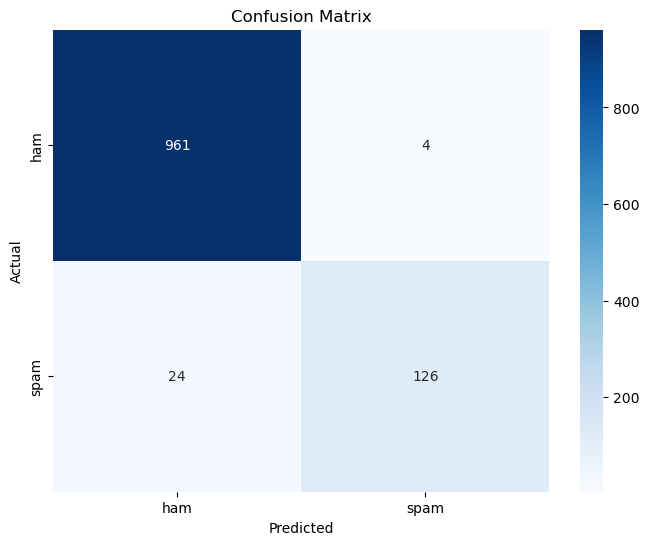

In [27]:
# visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visulize the Bar graph

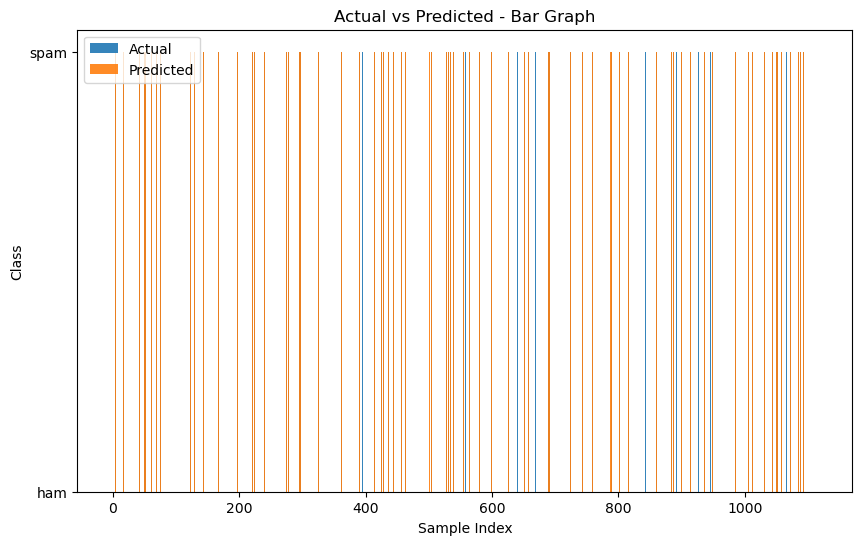

In [20]:
# visulize the Bar Graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), y_test, alpha=0.9, label='Actual')
plt.bar(range(len(y_pred)), y_pred, alpha=0.9, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Actual vs Predicted - Bar Graph')
plt.legend()

# Visulize the scatter plot and draw the predicted line

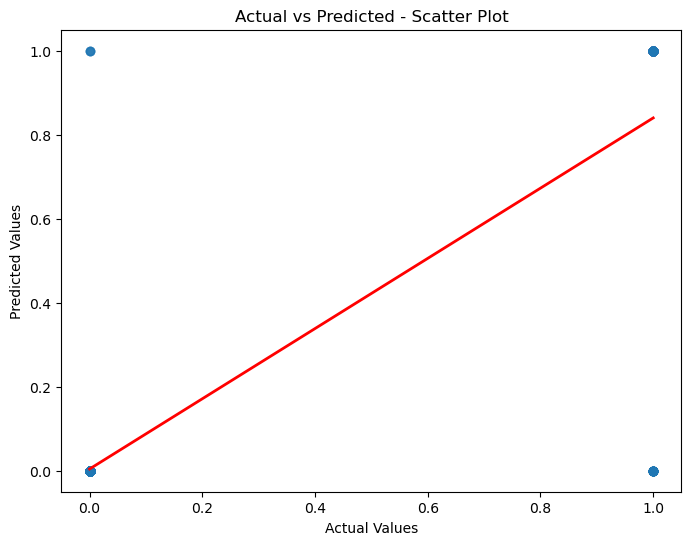

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the dataset for spam detection
df = pd.read_csv("C:\\Users\\91781\\Downloads\\archive (2)\\spam.csv", encoding='latin-1')
X = df['v2']
y = df['v1']

label_mapping = {'ham': 0, 'spam': 1}
y_numeric = y.map(label_mapping)

# Step 3: Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(X)

# Step 4: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Step 5: Choosing a Model (Support Vector Machine)
classifier = SVC(kernel='linear', random_state=42)

# Step 6: Training the Model
classifier.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = classifier.predict(X_test)

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Scatter Plot')

# Draw the line of best fit
fit = np.polyfit(y_test, y_pred, 1)
line = np.poly1d(fit)
plt.plot(y_test, line(y_test), color='red', linewidth=2)

plt.show()


## visulize the recall and precision Roc curve

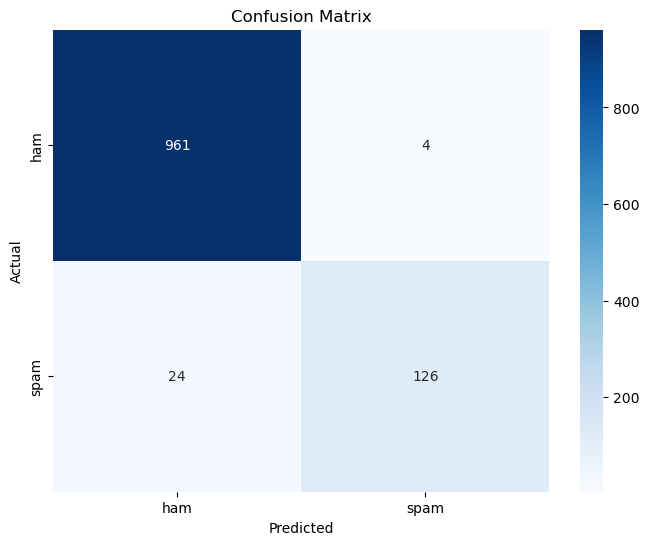

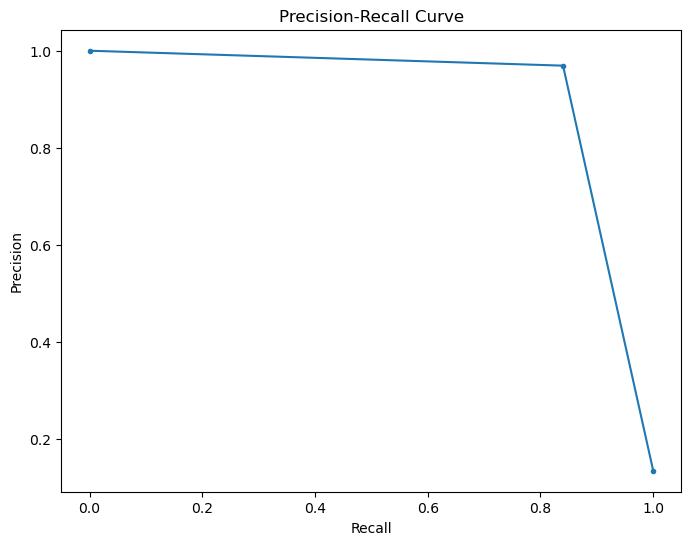

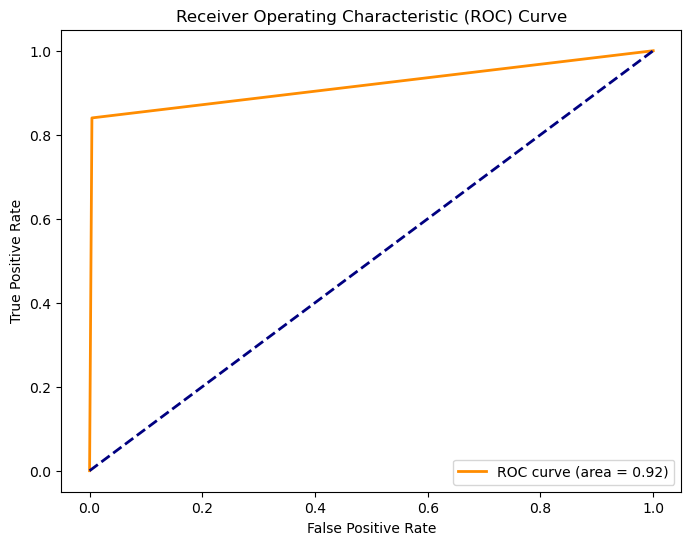

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Visualize ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Visulize the Histogram for predicted probabilities

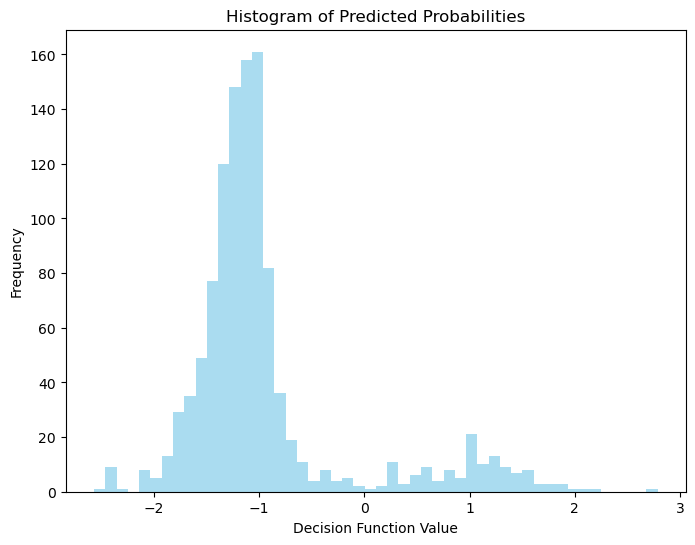

In [25]:
## Visulize the Histogram of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(classifier.decision_function(X_test), bins=50, color='skyblue', alpha=0.7)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Decision Function Value')
plt.ylabel('Frequency')
plt.show()


# Visulize the calibration curve

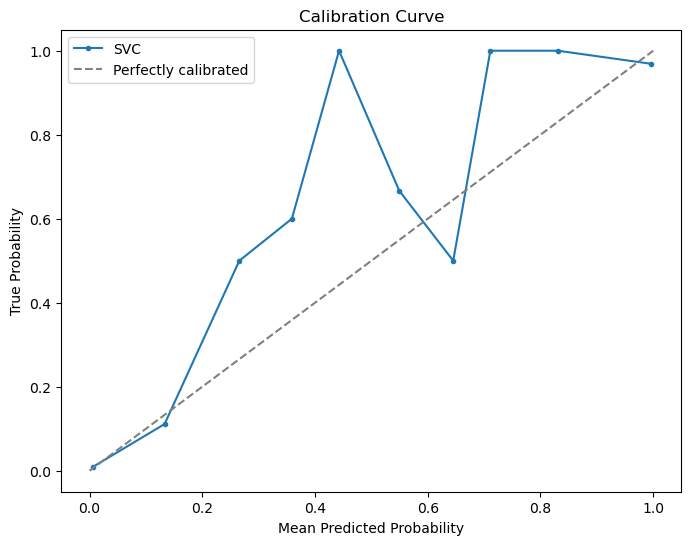

In [28]:
## Visulize the calibration curve

from sklearn.svm import SVC
from sklearn.calibration import calibration_curve

# Step 5: Choosing a Model (Support Vector Machine) with probability=True
classifier = SVC(kernel='linear', probability=True, random_state=42)

# Step 6: Training the Model
classifier.fit(X_train, y_train)

# Use predict_proba now
prob_true, prob_pred = calibration_curve(y_test, classifier.predict_proba(X_test)[:, 1], n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='.', label='SVC')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.title('Calibration Curve')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('True Probability')
plt.legend()
plt.show()